In [12]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets

In [2]:
air_pollution_raw = os.path.join("..","data","air_pollution_california_only.csv")
weighted_cars_raw = os.path.join("..","data","electric_vehicle_county.csv")
weighted_cars = pd.read_csv(weighted_cars_raw)
air_pollution = pd.read_csv(air_pollution_raw)
weighted_cars.head()

,Unnamed: 0,COUNTY,Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission
0,0,1,0.015331,0.015339,0.052245,0.051540,0.015331,0.015339,0.082906,0.082218
1,1,3,0.001779,0.001364,0.016459,0.016484,0.001779,0.001364,0.020018,0.019212
2,2,5,0.001197,0.001149,0.017245,0.017088,0.001197,0.001149,0.019639,0.019385
3,3,7,0.001370,0.001454,0.022598,0.023631,0.001370,0.001454,0.025339,0.026539
4,4,9,0.001587,0.001549,0.018363,0.018612,0.001587,0.001549,0.021536,0.021710


In [3]:
air_pollution_df = air_pollution.drop(columns=['Moderate Days','Good Days','Unhealthy for Sensitive Groups Days','Unhealthy Days',
                                 'Very Unhealthy Days','State Code (FIPS)','State','Unnamed: 0','Year'])
air_pollution_df.head()

,County,Days with AQI,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,County Code (FIPS)
0,Alameda County,365,0,223,76,51,0,10,72,0,283,0,1
1,Amador County,364,0,129,71,40,0,0,364,0,0,0,5
2,Butte County,365,4,445,104,54,0,0,203,0,161,1,7
3,Calaveras County,364,0,157,87,53,0,0,141,0,223,0,9
4,Colusa County,365,0,274,81,42,0,0,176,0,155,34,11


In [4]:
weighted_cars2 = weighted_cars.rename(columns={"COUNTY":"County Code (FIPS)"})
complete_data_pollution = pd.merge(weighted_cars2, air_pollution_df, how="inner", on=["County Code (FIPS)"])
complete_data_pollution.head()

,Unnamed: 0,County Code (FIPS),Battery Electric % Unadj,Battery Electric % adj,Hybrid Gasoline % Unadj,Hybrid Gasoline % adj,Plug Electric % Unadj,Plug Electric % adj,% Unadj Low Emission,% Adj Low Emission,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0,1,0.015331,0.015339,0.052245,0.051540,0.015331,0.015339,0.082906,0.082218,...,0,223,76,51,0,10,72,0,283,0
1,2,5,0.001197,0.001149,0.017245,0.017088,0.001197,0.001149,0.019639,0.019385,...,0,129,71,40,0,0,364,0,0,0
2,3,7,0.001370,0.001454,0.022598,0.023631,0.001370,0.001454,0.025339,0.026539,...,4,445,104,54,0,0,203,0,161,1
3,4,9,0.001587,0.001549,0.018363,0.018612,0.001587,0.001549,0.021536,0.021710,...,0,157,87,53,0,0,141,0,223,0
4,5,11,0.001064,0.001160,0.010282,0.010257,0.001064,0.001160,0.012410,0.012576,...,0,274,81,42,0,0,176,0,155,34


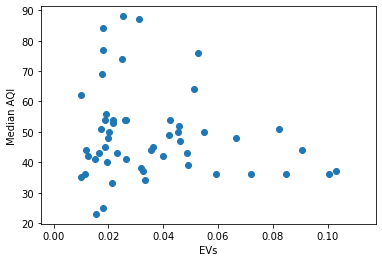

In [5]:
#plt.scatter(weighted_cars, air_pollution_df, marker="o", facecolors="red", edgecolors="black",
#            s=weighted_cars, alpha=0.75)
#plt.ylim(0, 100)
#plt.xlim(0, 1)
#plt.show()

x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Median AQI']
plt.scatter(x_values,y_values)
plt.xlabel('EVs')
plt.ylabel('Median AQI')
plt.show()

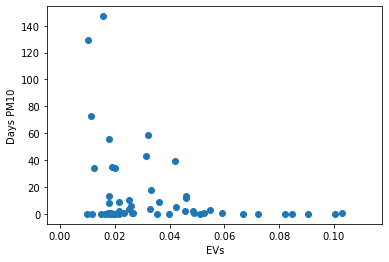

In [6]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Days PM10']
plt.scatter(x_values,y_values)
plt.xlabel('EVs')
plt.ylabel('Days PM10')
plt.show()

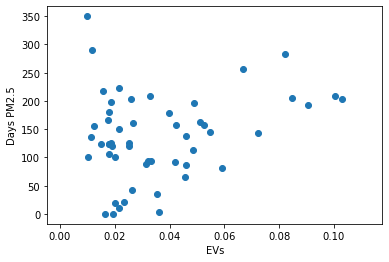

In [7]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Days PM2.5']
plt.scatter(x_values,y_values)
plt.xlabel('EVs')
plt.ylabel('Days PM2.5')
plt.show()

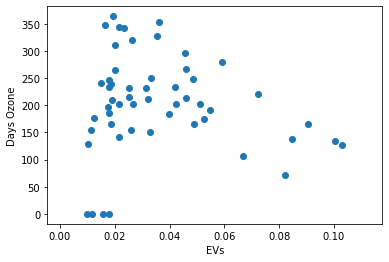

In [8]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Days Ozone']
plt.scatter(x_values,y_values)
plt.xlabel('EVs')
plt.ylabel('Days Ozone')
plt.show()

<IPython.core.display.Javascript object>


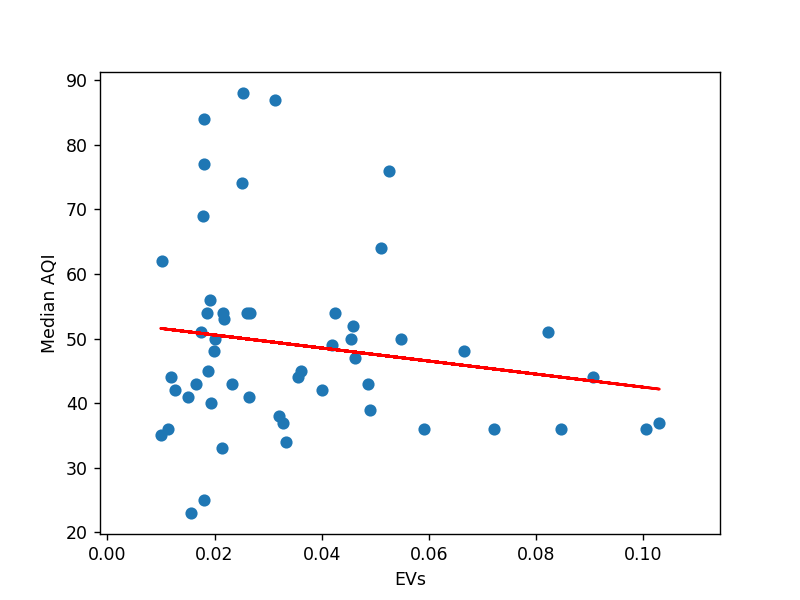

The r-squared is: -0.16419854002835033


In [19]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Median AQI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('EVs')
plt.ylabel('Median AQI')
print(f"The r-squared is: {rvalue}")
plt.show()

<IPython.core.display.Javascript object>


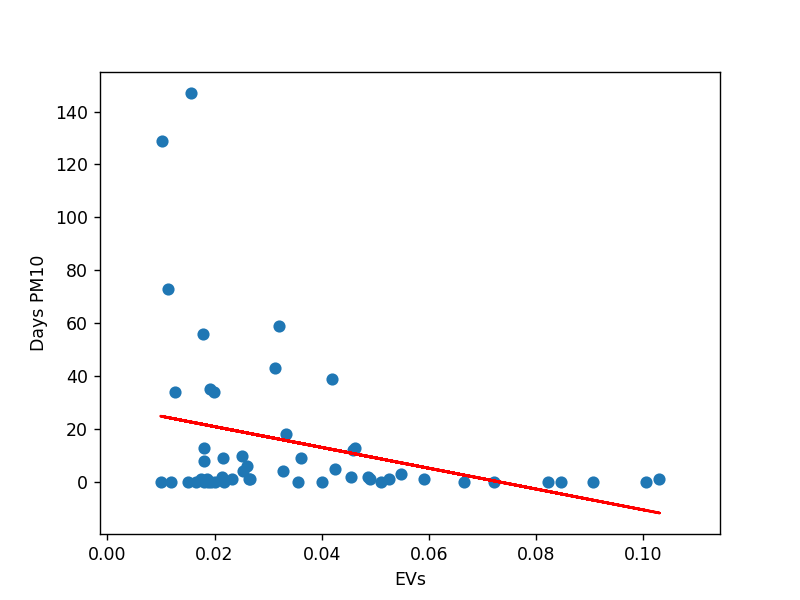

The r-squared is: -0.31159486830003624


In [18]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Days PM10']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('EVs')
plt.ylabel('Days PM10')
print(f"The r-squared is: {rvalue}")
plt.show()

<IPython.core.display.Javascript object>


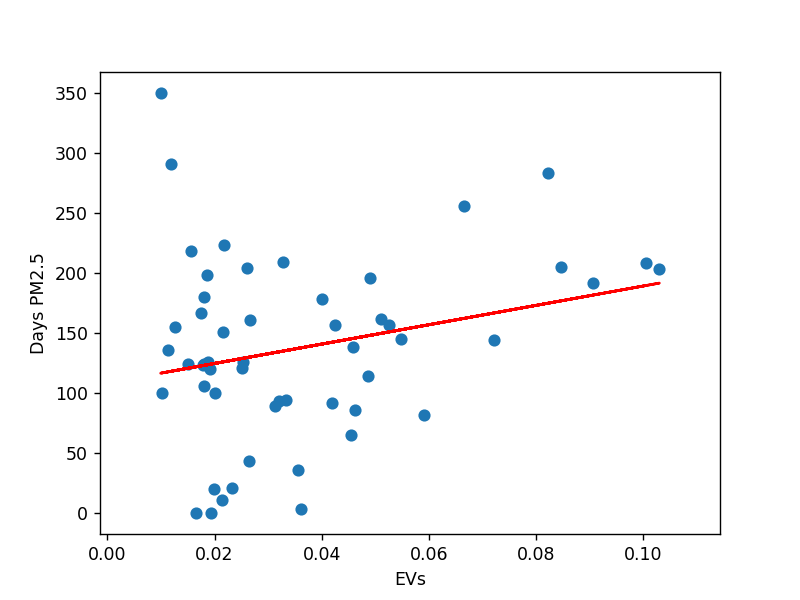

The r-squared is: 0.25218088860388516


In [17]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Days PM2.5']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('EVs')
plt.ylabel('Days PM2.5')
print(f"The r-squared is: {rvalue}")
plt.show()

<IPython.core.display.Javascript object>


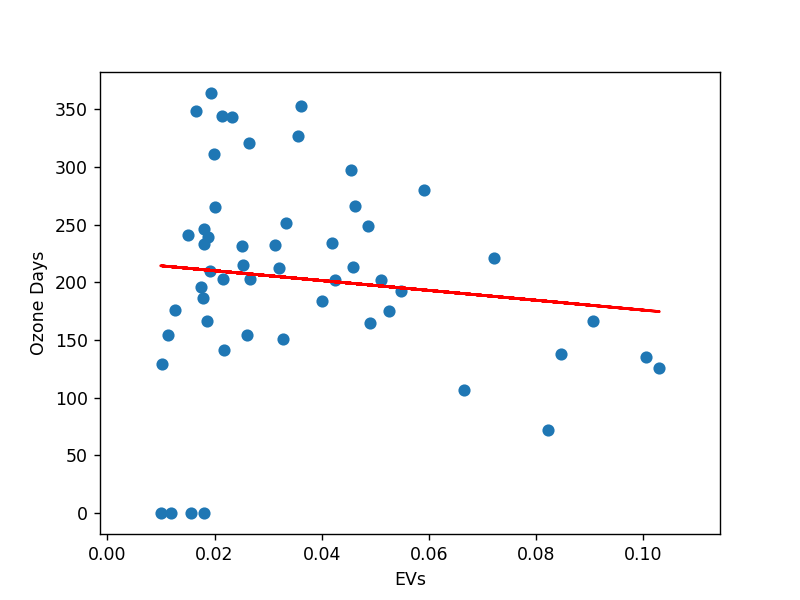

The r-squared is: -0.11368941417748465


In [16]:
x_values = complete_data_pollution['% Adj Low Emission']
y_values = complete_data_pollution['Days Ozone']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('EVs')
plt.ylabel('Ozone Days')
print(f"The r-squared is: {rvalue}")
plt.show()